### Importar las librerías necesarias

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind 
import scipy.stats as st


Usaremos la base de datos iris

In [6]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(url)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### a) Distribución t de Student

![Standard Error](formula3.webp)

In [8]:
se_length = iris['sepal_length'].std()/np.sqrt(len(iris['sepal_length']))
se_width = iris['sepal_width'].std()/np.sqrt(len(iris['sepal_width']))

![Standard Error Deviation](formula4.png)

In [10]:
sed = np.sqrt((se_length)**2 + (se_width)**2)

![t-student](formula5.png)

que es lo mismo que:

![t-student](formula6.png)

In [11]:
#Calculamos el valor de t
t_stat = (iris['sepal_length'].mean() - 
          iris['sepal_width'].mean())/sed
t_stat

np.float64(36.548157693982006)

In [12]:
#calculamos el valor de p (que también nos da el valor de t)
p = ttest_ind(iris['sepal_length'], iris['sepal_width'])
p

TtestResult(statistic=np.float64(36.548157693982006), pvalue=np.float64(3.987838114848222e-112), df=np.float64(298.0))

Dado que el valor de p es muy pequeño: aprox. 4e-112, para cualquier alpha que seleccionemos:
p< alpha, por lo tanto, rechazamos Ho.

#### b) Correlación y coeficiente de Pearson

In [13]:
#Correlación
iris['sepal_length'].corr(iris['sepal_width'])

np.float64(-0.10936924995064937)

El valor de correlación es muy cercano a cero, es decir, no existe una correlación entre las variables.

#### Coeficiente de Pearson
 H_0 : No existe correlación lineal entre las dos variables vs
 H_a : Existe una correlación lineal

In [18]:
#Coeficiente de Pearson (coeficiente de pearson, p-value)
st.pearsonr(iris['sepal_length'], iris['sepal_width'])

PearsonRResult(statistic=np.float64(-0.10936924995064937), pvalue=np.float64(0.18276521527136977))

El coeficiente de Pearson nos indica, de igual forma, que no hay una correlación entre las variables sepal_length y sepal_width. El p-value es 0.18, luego:

0.18 =p-value > alpha = 0.05.
Por tanto, NO rechazamos H_0; es decir, no hay suficiente evidencia para afirmar que existe una correlación lineal.

#### c) ANOVA

H_0: Todas las medias poblacionales son iguales vs
H_a: Al menos una media poblacional es distinta

In [19]:
f_oneway(iris['sepal_length'], iris['sepal_width'])

F_onewayResult(statistic=np.float64(1335.7678308241736), pvalue=np.float64(3.9878381148490526e-112))

Obtuvimos que el estadístico es: 1,335 y el p-value: 4e-112.
Es decir, p-value < alpha, luego rechazamos H_0.

Por lo tanto, existe al menos una media que es distinta

#### Gráfico sepal_length vs sepal_width

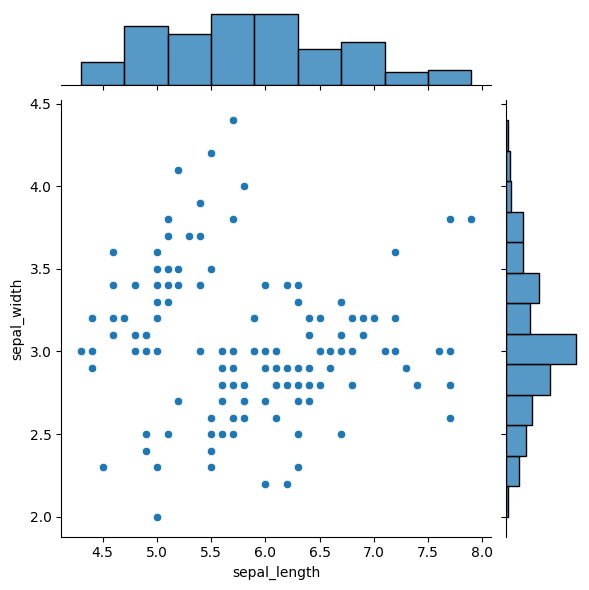

In [22]:
#Gráfico de jointplot: correlación y distribución
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)


Es claro que no hay una correlación lineal entre ambas variables.
La distribución de cada una de ellas se puede observar en los bordes; la distribucion de estas variables no parece ser la misma.